In [5]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.restoration import inpaint

from skbeam.core.image import gaussfill

%matplotlib inline

In [6]:
image_orig = data.astronaut()[0:200, 0:200]

# Create mask with three defect regions: left, middle, right respectively
mask = np.zeros(image_orig.shape[:-1])
mask[20:60, 0:20] = 1
mask[160:180, 70:155] = 1
mask[30:60, 170:195] = 1

In [7]:
# Defect image over the same region in each color channel
image_defect = image_orig.copy()
for layer in range(image_defect.shape[-1]):
    image_defect[np.where(mask)] = 0

image_result = inpaint.inpaint_biharmonic(image_defect, mask, multichannel=True)

sigma = 6

mask = (mask==0)
image_gaussfill = np.zeros_like(image_defect,dtype=float)
image_gaussfill[:,:,0] = gaussfill(image_defect[:,:,0], mask, sigma = sigma)
image_gaussfill[:,:,1] = gaussfill(image_defect[:,:,1], mask, sigma = sigma)
image_gaussfill[:,:,2] = gaussfill(image_defect[:,:,2], mask, sigma = sigma)
image_gaussfill = image_gaussfill/255.

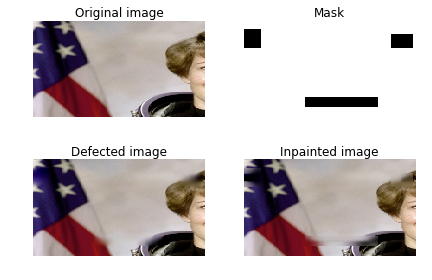

In [8]:
# plotting
fig, axes = plt.subplots(ncols=2, nrows=2)
ax = axes.ravel()

ax[0].set_title('Original image')
ax[0].imshow(image_orig)

ax[1].set_title('Mask')
ax[1].imshow(mask, cmap=plt.cm.gray)

ax[2].set_title('Defected image')
ax[2].imshow(image_result)

ax[3].set_title('Inpainted image')
ax[3].imshow(image_gaussfill)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()